In [680]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [681]:
df1 = pd.read_csv("faceit_elo.csv", sep=";")

In [682]:
df1.head()

,age,th,tmf,reg,kd,hs,snip,elo
0,19,700,53,as,0.76,45,0,1025
1,17,2500,300,oce,0.78,36,0,763
2,30,3200,2000,eu,1.15,48,0,2600
3,17,1200,120,na,1.07,51,0,1050
4,16,2700,371,eu,1.22,22,1,1625


In [683]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [684]:
X_num = df1[['age', 'th', 'tmf', 'kd', 'hs', 'snip']]
X_cat = df1[['reg']]

In [685]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
X_cat2 = ohe.fit_transform(X_cat)

In [686]:
X_cat2 = pd.DataFrame(X_cat2, columns=ohe.get_feature_names())

In [687]:
X_cat2.head()

,x0_as,x0_cis,x0_eu,x0_na,x0_o,x0_oce
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [688]:
X_train1 = X_num.join(X_cat2)

In [689]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [690]:
X_train1_sc = sc.fit_transform(X_train1)

In [691]:
X_train1.shape[0]

71

In [692]:
### corr matrix
corr = X_train1.join(y).corr()
print(type(corr))
corr.style.background_gradient(cmap='coolwarm')

<class 'pandas.core.frame.DataFrame'>


,age,th,tmf,kd,hs,snip,x0_as,x0_cis,x0_eu,x0_na,x0_o,x0_oce,elo
age,1.000000,0.040261,0.247448,-0.063230,-0.125531,-0.017697,-0.050509,-0.091499,0.136558,-0.003866,-0.072119,-0.099211,0.164017
th,0.040261,1.000000,0.653015,0.324082,0.084994,0.051123,-0.190604,0.008086,0.238146,-0.231381,0.078623,-0.084789,0.783664
tmf,0.247448,0.653015,1.000000,0.012275,0.104825,0.094654,-0.162710,-0.038218,0.264701,-0.191941,-0.044700,-0.088550,0.691937
kd,-0.063230,0.324082,0.012275,1.000000,0.145297,0.153537,-0.035928,0.069385,0.064543,-0.018877,-0.043287,-0.242935,0.380070
hs,-0.125531,0.084994,0.104825,0.145297,1.000000,-0.347734,0.119687,0.178312,-0.166995,-0.009431,0.085615,-0.115460,0.131077
snip,-0.017697,0.051123,0.094654,0.153537,-0.347734,1.000000,0.100466,-0.094078,0.090471,-0.065388,-0.080087,-0.080087,0.114476
x0_as,-0.050509,-0.190604,-0.162710,-0.035928,0.119687,0.100466,1.000000,-0.074235,-0.435477,-0.067252,-0.029204,-0.029204,-0.136126
x0_cis,-0.091499,0.008086,-0.038218,0.069385,0.178312,-0.094078,-0.074235,1.000000,-0.541491,-0.083624,-0.036314,-0.036314,0.032721
x0_eu,0.136558,0.238146,0.264701,0.064543,-0.166995,0.090471,-0.435477,-0.541491,1.000000,-0.490552,-0.213021,-0.213021,0.191102
x0_na,-0.003866,-0.231381,-0.191941,-0.018877,-0.009431,-0.065388,-0.067252,-0.083624,-0.490552,1.000000,-0.032898,-0.032898,-0.159464


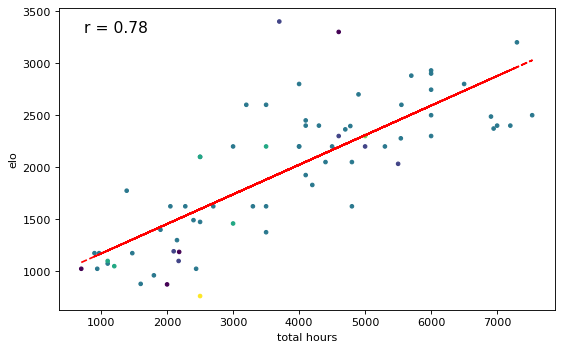

In [693]:
#### Elo/total hours plot
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(df1['th'], df1['elo'], s=10, c=le.fit_transform(df1['reg']));
z = np.polyfit(df1['th'], df1['elo'], 1)
p = np.poly1d(z)
plt.plot(df1['th'], p(df1['th']), "r--")
plt.xlabel("total hours")
plt.ylabel("elo");
corr = np.round(np.corrcoef([df1['th'], df1['elo']])[0, 1], 2)
plt.annotate(
        "r = " + str(corr),
        xy=(0.05, 0.92),
        xycoords="axes fraction",
        fontsize=14,
    );

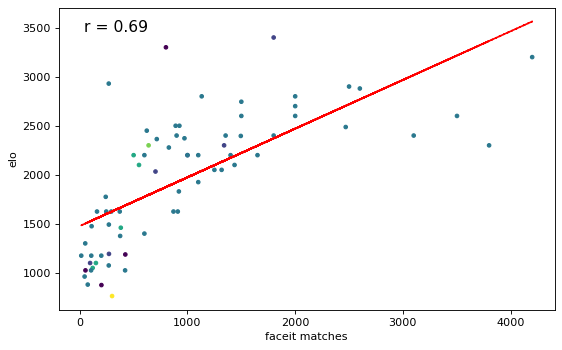

In [694]:
#### Elo/total faceit matches plot
le = LabelEncoder()
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(df1['tmf'], df1['elo'], s=10, c=le.fit_transform(df1['reg']));
z = np.polyfit(df1['tmf'], df1['elo'], 1)
p = np.poly1d(z)
plt.plot(df1['tmf'], p(df1['tmf']), "r--")
# z1 = np.polyfit(np.log(df1['tmf']), df1['elo'], 1)
# p1 = np.poly1d(z1)
# plt.plot(df1['tmf'], p1(np.log(df1['tmf'])), "b--")
plt.xlabel("faceit matches")
plt.ylabel("elo");
corr = np.round(np.corrcoef([df1['tmf'], df1['elo']])[0, 1], 2)
plt.annotate(
        "r = " + str(corr),
        xy=(0.05, 0.92),
        xycoords="axes fraction",
        fontsize=14,
    );

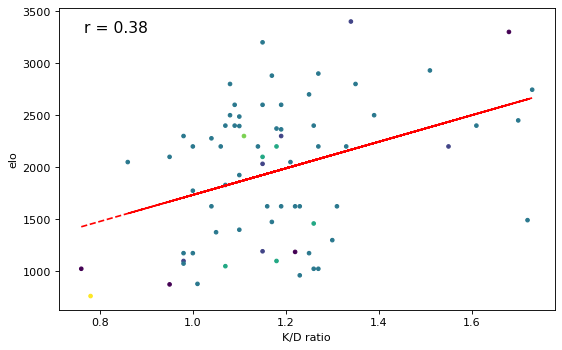

In [695]:
#### Elo/KD plot
le = LabelEncoder()
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(df1[df1['kd']<1.8]['kd'], df1[df1['kd']<1.8]['elo'], 
            s=10, c=le.fit_transform(df1[df1['kd']<1.8]['reg']));
z = np.polyfit(df1[df1['kd']<1.8]['kd'], df1[df1['kd']<1.8]['elo'], 1)
p = np.poly1d(z)
plt.plot(df1[df1['kd']<1.8]['kd'], p(df1[df1['kd']<1.8]['kd']), "r--")
plt.xlabel("K/D ratio")
plt.ylabel("elo");
corr = np.round(np.corrcoef([df1['kd'], df1['elo']])[0, 1], 2)
plt.annotate(
        "r = " + str(corr),
        xy=(0.05, 0.92),
        xycoords="axes fraction",
        fontsize=14,
    );

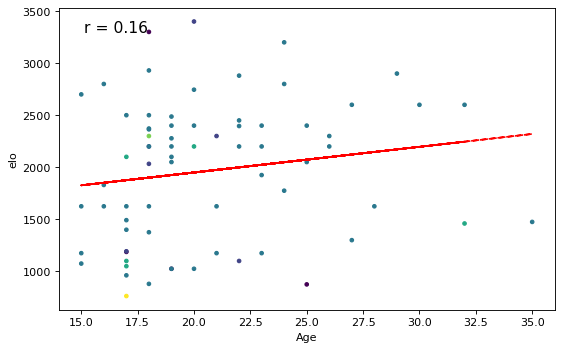

In [696]:
#### Elo/age plot
le = LabelEncoder()
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(df1['age'], df1['elo'], s=10, c=le.fit_transform(df1['reg']));
z = np.polyfit(df1['age'], df1['elo'], 1)
p = np.poly1d(z)
plt.plot(df1['age'], p(df1['age']), "r--")
plt.xlabel("Age")
plt.ylabel("elo");
corr = np.round(np.corrcoef([df1['age'], df1['elo']])[0, 1], 2)
plt.annotate(
        "r = " + str(corr),
        xy=(0.05, 0.92),
        xycoords="axes fraction",
        fontsize=14,
    );

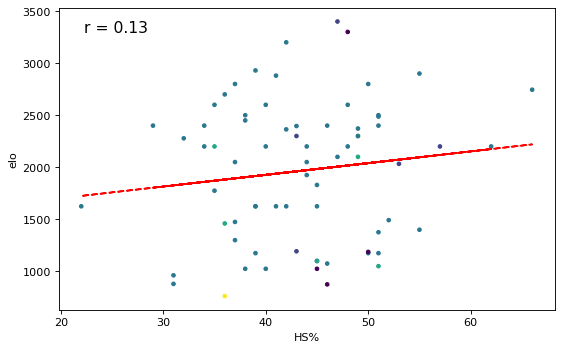

In [697]:
#### Elo/HS plot
le = LabelEncoder()
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(df1['hs'], df1['elo'], s=10, c=le.fit_transform(df1['reg']));
z = np.polyfit(df1['hs'], df1['elo'], 1)
p = np.poly1d(z)
plt.plot(df1['hs'], p(df1['hs']), "r--")
plt.xlabel("HS%")
plt.ylabel("elo");
corr = np.round(np.corrcoef([df1['hs'], df1['elo']])[0, 1], 2)
plt.annotate(
        "r = " + str(corr),
        xy=(0.05, 0.92),
        xycoords="axes fraction",
        fontsize=14,
    );

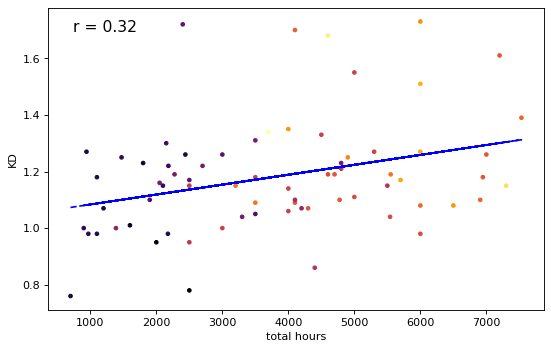

In [698]:
#### KD/total hours plot
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(df1['th'], df1['kd'], s=10, c=df1['elo'], cmap='inferno');
z = np.polyfit(df1['th'], df1['kd'], 1)
p = np.poly1d(z)
plt.plot(df1['th'], p(df1['th']), "b--")
plt.xlabel("total hours")
plt.ylabel("KD");
corr = np.round(np.corrcoef([df1['th'], df1['kd']])[0, 1], 2)
plt.annotate(
        "r = " + str(corr),
        xy=(0.05, 0.92),
        xycoords="axes fraction",
        fontsize=14,
    );

In [699]:
r_l = 651

In [700]:
r_r = (y.max() - r_l) - (y.max() - r_l)%150 + r_l + 150

In [701]:
(r_r-r_l)/150

19.0

In [702]:
bins1 = int((r_r-r_l)/150)

In [703]:
bins1

19

In [704]:
np.sort(y)

array([ 763,  875,  880,  962, 1025, 1025, 1025, 1050, 1075, 1100, 1100,
       1175, 1175, 1175, 1187, 1193, 1300, 1376, 1400, 1460, 1475, 1492,
       1625, 1625, 1625, 1625, 1625, 1625, 1775, 1830, 1925, 2033, 2050,
       2050, 2100, 2100, 2200, 2200, 2200, 2200, 2200, 2200, 2200, 2278,
       2300, 2300, 2300, 2364, 2372, 2396, 2400, 2400, 2400, 2400, 2450,
       2487, 2500, 2500, 2600, 2600, 2600, 2700, 2745, 2800, 2800, 2880,
       2900, 2930, 3200, 3300, 3400], dtype=int64)

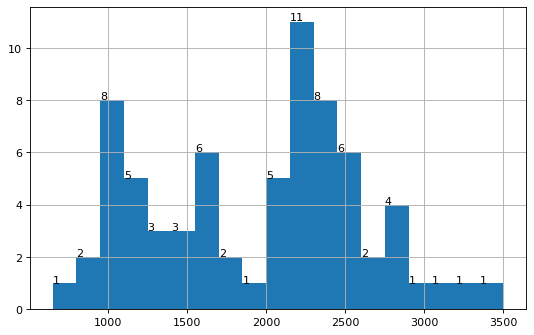

In [705]:
# elo distribution
plt.figure(figsize=(8, 5), dpi=80)
ax = y.hist(bins=bins1, range=(r_l,r_r));
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.15, p.get_height() * 1.005))
#     print(p.get_width())

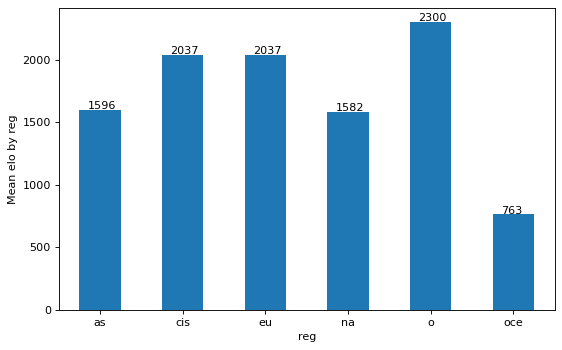

In [706]:
#### Mean elo by region
plt.figure(figsize=(8, 5), dpi=80)
ax = df1.groupby('reg').agg('mean')['elo'].plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.1, p.get_height() * 1.005))
plt.ylabel("Mean elo by reg");

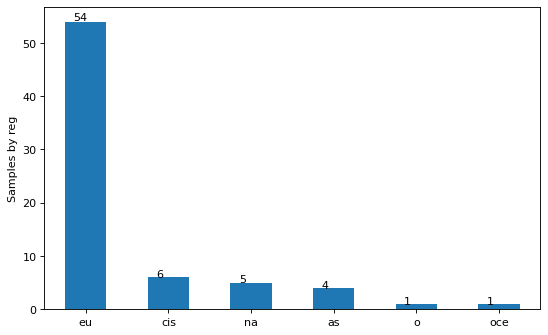

In [707]:
#### Number of samples by region
plt.figure(figsize=(8, 5), dpi=80)
ax = df1['reg'].value_counts().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.1, p.get_height() * 1.005))
plt.ylabel("Samples by reg");

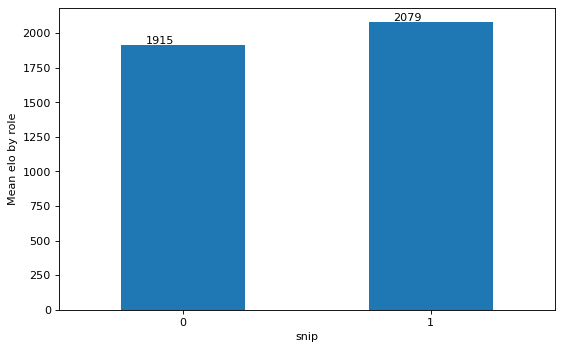

In [708]:
#### Mean elo by role
plt.figure(figsize=(8, 5), dpi=80)
ax = df1.groupby('snip').agg('mean')['elo'].plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.1, p.get_height() * 1.005))
plt.ylabel("Mean elo by role");

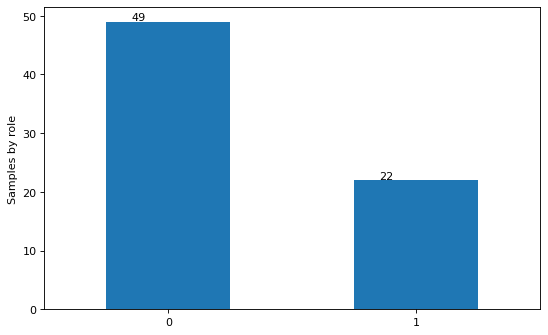

In [709]:
#### Number of samples by role
plt.figure(figsize=(8, 5), dpi=80)
ax = df1['snip'].value_counts().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.1, p.get_height() * 1.005))
plt.ylabel("Samples by role");

#### Linear Regression

In [710]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin1 = LinearRegression()
lin1.fit(X_train1, y)
pr_tr1 = lin1.predict(X_train1)
from sklearn.metrics import r2_score
r2_score(y, pr_tr1)

0.7317664914232532

In [711]:
dict(zip(X_train1.columns, lin1.coef_))

{'age': 10.877682524393858,
 'th': 0.1729779725110347,
 'tmf': 0.2589593077378696,
 'kd': 666.9051344009484,
 'hs': 1.9127579067398854,
 'snip': 51.48281819366832,
 'x0_as': 47.52919337648463,
 'x0_cis': 74.84326913975273,
 'x0_eu': -16.28671831325156,
 'x0_na': 63.0677269733139,
 'x0_o': 295.89608127932706,
 'x0_oce': -465.0495524556256}

In [712]:
lin1.intercept_

-56.04906353339334

In [713]:
from sklearn.model_selection import cross_validate 

In [714]:
# Linear Regression
#print(np.mean(cross_validate(lin1, X_train1, y, cv=5, scoring='neg_mean_absolute_error')['test_score']))
rmse_5 = np.mean(cross_validate(lin1, X_train1, y, cv=5, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_5)
r2_5 = np.mean(cross_validate(lin1, X_train1, y, cv=5, scoring='r2')['test_score'])
print(r2_5)
#print(np.mean(cross_validate(lin1, X_train1, y, cv=4, scoring='neg_mean_absolute_error')['test_score']))
rmse_4 = np.mean(cross_validate(lin1, X_train1, y, cv=4, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_4)
r2_4 = np.mean(cross_validate(lin1, X_train1, y, cv=4, scoring='r2')['test_score'])
print(r2_4)
#print(np.mean(cross_validate(lin1, X_train1, y, cv=3, scoring='neg_mean_absolute_error')['test_score']))
rmse_3 = np.mean(cross_validate(lin1, X_train1, y, cv=3, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_3)
r2_3 = np.mean(cross_validate(lin1, X_train1, y, cv=3, scoring='r2')['test_score'])
print(r2_3)
lin_m = np.mean([r2_3, r2_4, r2_5])
lin_rmse_m = np.mean([rmse_3, rmse_4, rmse_5])
print("---------------------")
print(np.round(lin_rmse_m, 2))
print(np.round(lin_m, 2))

-424.54189964585777
0.4941390908542786
-458.453899763166
0.38609094877035904
-480.91221265219866
0.43726540706765366
---------------------
-454.64
0.44


#### Random Forest

In [715]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train1, y)
pr_tr2 = rfr.predict(X_train1)
r2_score(y, pr_tr2)

0.957715613318724

In [716]:
np.set_printoptions(suppress=True)
dict(zip(X_train1.columns, rfr.feature_importances_ * 100))

{'age': 3.5246880068566897,
 'th': 44.651829472972324,
 'tmf': 40.188468200763644,
 'kd': 5.83204907988777,
 'hs': 2.097386506910901,
 'snip': 0.6254499648787692,
 'x0_as': 1.5085952559115825,
 'x0_cis': 0.4155882591996902,
 'x0_eu': 0.9555290048310627,
 'x0_na': 0.11248140667472784,
 'x0_o': 0.018794875205667503,
 'x0_oce': 0.06913996590718431}

In [717]:
# RF
#print(np.mean(cross_validate(rfr, X_train1, y, cv=5, scoring='neg_mean_absolute_error')['test_score']))
rmse_5 = np.mean(cross_validate(rfr, X_train1, y, cv=5, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_5)
r2_5 = np.mean(cross_validate(rfr, X_train1, y, cv=5, scoring='r2')['test_score'])
print(r2_5)
#print(np.mean(cross_validate(rfr, X_train1, y, cv=4, scoring='neg_mean_absolute_error')['test_score']))
rmse_4 = np.mean(cross_validate(rfr, X_train1, y, cv=4, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_4)
r2_4 = np.mean(cross_validate(rfr, X_train1, y, cv=4, scoring='r2')['test_score'])
print(r2_4)
#print(np.mean(cross_validate(rfr, X_train1, y, cv=3, scoring='neg_mean_absolute_error')['test_score']))
rmse_3 = np.mean(cross_validate(rfr, X_train1, y, cv=3, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_3)
r2_3 = np.mean(cross_validate(rfr, X_train1, y, cv=3, scoring='r2')['test_score'])
print(r2_3)
rf_m = np.mean([r2_3, r2_4, r2_5])
rf_rmse_m = np.mean([rmse_3, rmse_4, rmse_5])
print("---------------------")
print(np.round(rf_rmse_m, 2))
print(np.round(rf_m, 2))

-365.23933035980446
0.5898975407700119
-396.01347589287974
0.5102301079509741
-363.0968755900955
0.6702343636679826
---------------------
-374.78
0.59


#### Random Forest GS

In [718]:
from sklearn.model_selection import GridSearchCV
gcv_rf = GridSearchCV(
    rfr, param_grid={
    'n_estimators': [50 ,30, 20, 10], 
    'max_depth': [2, 3, 4, 5, None],
    'max_samples': [None, 0.9],
    'random_state': [42]
    },
    cv=4
)
gcv_rf.fit(X_train1, y)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_samples': [None, 0.9],
                         'n_estimators': [50, 30, 20, 10],
                         'random_state': [42]})

In [719]:
(gcv_rf.best_params_, gcv_rf.best_score_)

({'max_depth': 4, 'max_samples': 0.9, 'n_estimators': 20, 'random_state': 42},
 0.5338585500292199)

In [720]:
dict(zip(X_train1.columns, gcv_rf.best_estimator_.feature_importances_ * 100))

{'age': 2.982810844147493,
 'th': 46.24502323860519,
 'tmf': 40.04904142878852,
 'kd': 6.157790144970147,
 'hs': 0.6884017688804829,
 'snip': 0.33998111272936354,
 'x0_as': 1.41336661141404,
 'x0_cis': 0.8088450767944254,
 'x0_eu': 1.1714641953859166,
 'x0_na': 0.14327557828441745,
 'x0_o': 0.0,
 'x0_oce': 0.0}

In [721]:
# Optimized RF
#print(np.mean(cross_validate(gcv_rf.best_estimator_, X_train1, y, cv=5, scoring='neg_mean_absolute_error')['test_score']))
rmse_5 = np.mean(cross_validate(gcv_rf.best_estimator_, X_train1, y, cv=5, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_5)
r2_5 = np.mean(cross_validate(gcv_rf.best_estimator_, X_train1, y, cv=5, scoring='r2')['test_score'])
print(r2_5)
#print(np.mean(cross_validate(gcv_rf.best_estimator_, X_train1, y, cv=4, scoring='neg_mean_absolute_error')['test_score']))
rmse_4 = np.mean(cross_validate(gcv_rf.best_estimator_, X_train1, y, cv=4, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_4)
r2_4 = np.mean(cross_validate(gcv_rf.best_estimator_, X_train1, y, cv=4, scoring='r2')['test_score'])
print(r2_4)
#print(np.mean(cross_validate(gcv_rf.best_estimator_, X_train1, y, cv=3, scoring='neg_mean_absolute_error')['test_score']))
rmse_3 = np.mean(cross_validate(gcv_rf.best_estimator_, X_train1, y, cv=3, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_3)
r2_3 = np.mean(cross_validate(gcv_rf.best_estimator_, X_train1, y, cv=3, scoring='r2')['test_score'])
print(r2_3)
rf_gc_m = np.mean([r2_3, r2_4, r2_5])
rf_gc_rmse_m = np.mean([rmse_3, rmse_4, rmse_5])
print("---------------------")
print(np.round(rf_gc_rmse_m, 2))
print(np.round(rf_gc_m, 2))

-360.18208796640954
0.613920005530139
-382.41051187860523
0.5338585500292199
-362.12139524167964
0.6798935360858703
---------------------
-368.24
0.61


#### SVR

In [722]:
from sklearn.svm import SVR
svr = SVR()

In [723]:
gcv_svr = GridSearchCV(
    svr, param_grid={
    'kernel': ['poly', 'rbf', 'linear', 'sigmoid'],
    'C': [70, 60, 50, 40, 30, 25, 20, 15, 10, 1, 0.1],
    'epsilon': [0.01, 0.1, 0.3, 0.65, 1., 1.3, 1.65, 2, 2.3, 2.65, 3, 5, 10, 20]
    },
    cv=4
)
gcv_svr.fit(X_train1_sc, y)
(gcv_svr.best_params_, gcv_svr.best_score_)

({'C': 70, 'epsilon': 0.01, 'kernel': 'linear'}, 0.48107366964072906)

In [724]:
#SVR
#print(np.mean(cross_validate(gcv_svr.best_estimator_, X_train1_sc, y, cv=5, scoring='neg_mean_absolute_error')['test_score']))
rmse_5 = np.mean(cross_validate(gcv_svr.best_estimator_, X_train1_sc, y, cv=5, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_5)
r2_5 = np.mean(cross_validate(gcv_svr.best_estimator_, X_train1_sc, y, cv=5, scoring='r2')['test_score'])
print(r2_5)
#print(np.mean(cross_validate(gcv_svr.best_estimator_, X_train1_sc, y, cv=4, scoring='neg_mean_absolute_error')['test_score']))
rmse_4 = np.mean(cross_validate(gcv_svr.best_estimator_, X_train1_sc, y, cv=4, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_4)
r2_4 = np.mean(cross_validate(gcv_svr.best_estimator_, X_train1_sc, y, cv=4, scoring='r2')['test_score'])
print(r2_4)
#print(np.mean(cross_validate(gcv_svr.best_estimator_, X_train1_sc, y, cv=3, scoring='neg_mean_absolute_error')['test_score']))
rmse_3 = np.mean(cross_validate(gcv_svr.best_estimator_, X_train1_sc, y, cv=3, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_3)
r2_3 = np.mean(cross_validate(gcv_svr.best_estimator_, X_train1_sc, y, cv=3, scoring='r2')['test_score'])
print(r2_3)
svr_gc_m = np.mean([r2_3, r2_4, r2_5])
svr_gc_rmse_m = np.mean([rmse_3, rmse_4, rmse_5])
print("---------------------")
print(np.round(svr_gc_rmse_m, 2))
print(np.round(svr_gc_m, 2))

-394.3857053649405
0.5507892576730977
-409.3080373818957
0.48107366964072906
-479.0570405027491
0.43751511655943354
---------------------
-427.58
0.49


#### KNR

In [725]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [726]:
gcv_knr = GridSearchCV(
    knr, 
    param_grid={
        'n_neighbors': [10,8,6,5,4,3,2],
        'weights': ['uniform', 'distance']
    }, 
    cv=4
)
gcv_knr.fit(X_train1_sc, y)
(gcv_knr.best_params_, gcv_knr.best_score_)

({'n_neighbors': 8, 'weights': 'uniform'}, 0.2904524598722597)

In [727]:
# KNR
#print(np.mean(cross_validate(gcv_knr.best_estimator_, X_train1_sc, y, cv=5, scoring='neg_mean_absolute_error')['test_score']))
rmse_5 = np.mean(cross_validate(gcv_knr.best_estimator_, X_train1_sc, y, cv=5, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_5)
r2_5 = np.mean(cross_validate(gcv_knr.best_estimator_, X_train1_sc, y, cv=5, scoring='r2')['test_score'])
print(r2_5)
#print(np.mean(cross_validate(gcv_knr.best_estimator_, X_train1_sc, y, cv=4, scoring='neg_mean_absolute_error')['test_score']))
rmse_4 = np.mean(cross_validate(gcv_knr.best_estimator_, X_train1_sc, y, cv=4, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_4)
r2_4 = np.mean(cross_validate(gcv_knr.best_estimator_, X_train1_sc, y, cv=4, scoring='r2')['test_score'])
print(r2_4)
#print(np.mean(cross_validate(gcv_knr.best_estimator_, X_train1_sc, y, cv=3, scoring='neg_mean_absolute_error')['test_score']))
rmse_3 = np.mean(cross_validate(gcv_knr.best_estimator_, X_train1_sc, y, cv=3, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_3)
r2_3 = np.mean(cross_validate(gcv_knr.best_estimator_, X_train1_sc, y, cv=3, scoring='r2')['test_score'])
print(r2_3)
knr_gc_m = np.mean([r2_3, r2_4, r2_5])
knr_gc_rmse_m = np.mean([rmse_3, rmse_4, rmse_5])
print("---------------------")
print(np.round(knr_gc_rmse_m, 2))
print(np.round(knr_gc_m, 2))

-462.05539808443507
0.41717375917379745
-492.30772867523444
0.2904524598722597
-492.6146285781624
0.41074528508955943
---------------------
-482.33
0.37


#### BayesianRidge

In [728]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()

In [729]:
gcv_br = GridSearchCV(br, 
                    param_grid={'alpha_1':[1e-05,1e-06,1e-07], 
                                'alpha_2':[1e-05,1e-06,1e-07], 
                                'lambda_1':[1e-05,1e-06,1e-07], 
                                'lambda_2':[1e-05,1e-06,1e-07]}, 
                    cv=4
)
gcv_br.fit(X_train1_sc, y)
(gcv_br.best_params_, gcv_br.best_score_)

({'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1': 1e-05, 'lambda_2': 1e-07},
 0.42374324337437064)

In [730]:
# BR
#print(np.mean(cross_validate(gcv_br.best_estimator_, X_train1_sc, y, cv=5, scoring='neg_mean_absolute_error')['test_score']))
rmse_5 = np.mean(cross_validate(gcv_br.best_estimator_, X_train1_sc, y, cv=5, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_5)
r2_5 = np.mean(cross_validate(gcv_br.best_estimator_, X_train1_sc, y, cv=5, scoring='r2')['test_score'])
print(r2_5)
#print(np.mean(cross_validate(gcv_br.best_estimator_, X_train1_sc, y, cv=4, scoring='neg_mean_absolute_error')['test_score']))
rmse_4 = np.mean(cross_validate(gcv_br.best_estimator_, X_train1_sc, y, cv=4, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_4)
r2_4 = np.mean(cross_validate(gcv_br.best_estimator_, X_train1_sc, y, cv=4, scoring='r2')['test_score'])
print(r2_4)
#print(np.mean(cross_validate(gcv_br.best_estimator_, X_train1_sc, y, cv=3, scoring='neg_mean_absolute_error')['test_score']))
rmse_3 = np.mean(cross_validate(gcv_br.best_estimator_, X_train1_sc, y, cv=3, scoring='neg_root_mean_squared_error')['test_score'])
print(rmse_3)
r2_3 = np.mean(cross_validate(gcv_br.best_estimator_, X_train1_sc, y, cv=3, scoring='r2')['test_score'])
print(r2_3)
br_gc_m = np.mean([r2_3, r2_4, r2_5])
br_gc_rmse_m = np.mean([rmse_3, rmse_4, rmse_5])
print("---------------------")
print(np.round(br_gc_rmse_m, 2))
print(np.round(br_gc_m, 2))

-413.7031690881448
0.5198174870623893
-444.92620538122037
0.42374324337437064
-462.2091799137381
0.482453143459761
---------------------
-440.28
0.48


#### NN

In [731]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# import tensorflow as tf
# import tensorflow.keras as keras
# from tensorflow.keras import Sequential, layers
# from tensorflow.keras.callbacks import TensorBoard
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# from time import time
# from keras.models import load_model

In [732]:
# VALIDATION_FRACTION = 0.15
# train_X, val_X, train_y, val_y = train_test_split(X_train1_sc, y, test_size=VALIDATION_FRACTION, random_state=0)

In [733]:
# train_X.shape[1]

In [734]:
# from sklearn.model_selection import train_test_split, KFold
# import scipy
# first_col = True
# cross_fold = KFold(n_splits = 4, shuffle=True)
# for train_index, test_index in cross_fold.split(X_train1_sc):
#     validation_X, validation_y = X_train1_sc[test_index], y[test_index]
#     train_X, train_y = X_train1_sc[train_index], y[train_index]
    
#     # determine the number of input features
#     n_features = X_train1_sc.shape[1]
#     # define model
#     model = Sequential()
#     model.add(layers.Dense(512, kernel_initializer='he_normal', input_shape=(n_features,)))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Activation('elu'))
#     model.add(layers.Dropout(0.5))
#     model.add(layers.Dense(128, kernel_initializer='he_normal'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Activation('elu'))
#     model.add(layers.Dropout(0.5))
#     model.add(layers.Dense(1))
#     # compile the model
#     model.compile(optimizer=keras.optimizers.Adam(lr=0.5, \
#         beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss='msle')
#     #callbacks
#     # simple early stopping
#     es = EarlyStopping(monitor='val_loss', mode='min', min_delta=0.0001, verbose=1, patience=20)
#     mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

#     tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
    
#     rlrop = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, verbose=1)
    
#     # fit model and save the best
#     history = model.fit(x=train_X, y=train_y, 
# #                         steps_per_epoch=steps_per_epoch, 
#                         batch_size=32, 
#                         epochs=1000, 
#                         validation_data=(validation_X, validation_y), 
# #                         validation_steps=validation_steps, 
#                         shuffle=True, 
#                         callbacks=[tensorboard, es, mc, rlrop]
#                        )
#     saved_model = load_model('best_model.h5')
    
#     predict = saved_model.predict(X_test1_sc)
# #     predict = probs.argmax(axis=1)
#     if first_col:
#         pr_values = np.array(predict, ndmin=2)
#         pr_values = np.transpose(pr_values)
#         first_col = False
#     else:
#         pr_values = np.insert(pr_values, -1, predict, axis=1)
# pr_values= np.mean(pr_values, axis=1)

In [735]:
# pr_values

In [736]:
# BATCH_SIZE = 128
# TOL = 0.0001
# N_ITER_NO_CHANGE = 10
# VERBOSE = 1
# MAX_EPOCHS = 300

# model = Sequential()
# n_features = X_train1_sc.shape[1]
# model.add(layers.Dense(1024, input_shape=(n_features,), kernel_initializer='random_normal', activation='elu'))
# # model.add(layers.Dropout(0.33))
# # model.add(layers.Dense(512, kernel_initializer='random_normal', activation='elu'))
# # model.add(layers.Dense(256, kernel_initializer='random_normal', activation='elu'))
# # model.add(layers.Dropout(0.33))
# # model.add(layers.Dense(256, kernel_initializer='random_normal', activation='elu'))
# # model.add(layers.Dense(128, kernel_initializer='random_normal', activation='elu'))
# model.add(layers.Dense(1))
# model.compile(optimizer=keras.optimizers.Adam(lr=0.5, \
#         beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss='msle')

# # simple early stopping
# # es = EarlyStopping(monitor='val_loss', mode='min', min_delta=TOL, verbose=VERBOSE, patience=N_ITER_NO_CHANGE)
# mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=VERBOSE, save_best_only=True)

# # fit model
# steps_per_epoch = train_X.shape[0]//BATCH_SIZE
# validation_steps = val_X.shape[0]//BATCH_SIZE

# tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
# # fit model and save the best
# history = model.fit(x=train_X, y=train_y, 
# #                     steps_per_epoch=steps_per_epoch, 
#                     epochs=MAX_EPOCHS,
#                     batch_size=BATCH_SIZE,
#                     validation_data=(val_X, val_y), 
#                     shuffle=True, 
#                     callbacks=[tensorboard, es, mc]
#                    )
# saved_model = load_model('best_model.h5')

In [737]:
# saved_model.predict(X_test1_sc)

In [738]:
# nn1 = saved_model
# # BR
# #print(np.mean(cross_validate(nn1, X_train1_sc, y, cv=5, scoring='neg_mean_absolute_error')['test_score']))
# print(np.mean(cross_validate(nn1, X_train1_sc, y, cv=5, scoring='neg_root_mean_squared_error')['test_score']))
# r2_5 = np.mean(cross_validate(nn1, X_train1_sc, y, cv=5, scoring='r2')['test_score'])
# print(r2_5)
# #print(np.mean(cross_validate(nn1, X_train1_sc, y, cv=4, scoring='neg_mean_absolute_error')['test_score']))
# print(np.mean(cross_validate(nn1, X_train1_sc, y, cv=4, scoring='neg_root_mean_squared_error')['test_score']))
# r2_4 = np.mean(cross_validate(nn1, X_train1_sc, y, cv=4, scoring='r2')['test_score'])
# print(r2_4)
# #print(np.mean(cross_validate(nn1, X_train1_sc, y, cv=3, scoring='neg_mean_absolute_error')['test_score']))
# print(np.mean(cross_validate(nn1, X_train1_sc, y, cv=3, scoring='neg_root_mean_squared_error')['test_score']))
# r2_3 = np.mean(cross_validate(nn1, X_train1_sc, y, cv=3, scoring='r2')['test_score'])
# print(r2_3)
# br_gc_m = np.mean([r2_3, r2_4, r2_5])
# print(np.round(br_gc_m, 2))

#### Prediction

In [739]:
test1 = pd.read_csv("faceit_elo2.csv", sep=";")

In [740]:
test1.head()

,name,age,th,tmf,reg,kd,hs,snip,elo
0,alexo22,22,2175,96,cis,0.98,45.0,0,NaN
1,Kuroki,18,4600,800,as,1.68,48.0,1,NaN
2,Janin_muna,19,942,421,eu,1.27,40.0,0,NaN
3,mushroom_tattoo,32,3000,381,na,1.26,36.0,0,NaN
4,B_Tannen,17,2500,300,oce,0.78,36.0,0,NaN


In [741]:
test1_num = test1[['age', 'th', 'tmf', 'kd', 'hs', 'snip']]
test1_cat = test1[['reg']]

In [742]:
test1_cat2 = ohe.transform(test1_cat)

In [743]:
test1_cat2 = pd.DataFrame(test1_cat2, columns=ohe.get_feature_names())

In [744]:
X_test1 = test1_num.join(test1_cat2)

In [745]:
X_test1_sc = sc.transform(X_test1)

In [746]:
X_test1.shape

(98, 12)

In [747]:
pr1 = lin1.predict(X_test1)

In [748]:
rfr.fit(X_train1, y)
pr2 = rfr.predict(X_test1)

In [749]:
gcv_rf.best_estimator_.fit(X_train1, y)
pr3 = gcv_rf.best_estimator_.predict(X_test1)

In [750]:
gcv_svr.best_estimator_.fit(X_train1_sc, y)
pr4 = gcv_svr.best_estimator_.predict(X_test1_sc)

In [751]:
gcv_knr.best_estimator_.fit(X_train1_sc, y)
pr5 = gcv_knr.best_estimator_.predict(X_test1_sc)

In [752]:
gcv_br.best_estimator_.fit(X_train1_sc, y)
pr6 = gcv_br.best_estimator_.predict(X_test1_sc)

In [753]:
if rf_m > rf_gc_m:
    print('DEF RF')
    gc_all = [
        rf_m**2, 
        svr_gc_m**2, 
#         knr_gc_m**2, 
        br_gc_m**2
    ]
else:
    print('OPT RF')
    gc_all = [
        rf_gc_m**2, 
        svr_gc_m**2, 
#         knr_gc_m**2, 
        br_gc_m**2
    ]
gc_sum = np.sum(gc_all)
weights = [gc_all[i]/gc_sum for i in range(len(gc_all))]
print(weights)
if rf_m > rf_gc_m:
    pr_ens = (
        pr2 * weights[0] + #RF
        pr4 * weights[1] + #SVR
#         pr5 * weights[2] + #KNR
        pr6 * weights[2]   #BR
    )
else:
    pr_ens = (
        pr3 * weights[0] + #RF
        pr4 * weights[1] + #SVR
#         pr5 * weights[2] + #KNR
        pr6 * weights[2]   #BR
    )

OPT RF
[0.4434352037300149, 0.2866161776814423, 0.2699486185885428]


In [754]:
results = pd.DataFrame([pr1, pr2, pr3, pr4, pr5, pr6, pr_ens], 
                       index=['LR', 'RFR', 'RFR_GC', 'SVR_GC', 'KNR_GC', 'BR_GC', 'ENC'],
                       columns=test1['name']
                      )
# results = results.reindex(['name', 'LR', 'RFR', 'RFR_GC', 'SVR_GC'])
results.iloc[:,-5:]

name,MrSleepZ,Mecseki,exclusive_premium_hltv_acc,DeXXuS,stubakuula
LR,1658.676981,1318.212757,4209.563742,2544.975064,1754.040357
RFR,1948.550000,1236.550000,2767.760000,2583.940000,2004.320000
RFR_GC,1808.122840,1318.785407,2828.543566,2632.360134,2023.307439
SVR_GC,1842.010394,1375.700736,4226.284670,2621.646331,1718.722076
KNR_GC,1996.875000,1496.125000,2633.375000,2410.625000,1893.750000
BR_GC,1684.546143,1368.988893,4044.512959,2504.081659,1779.094070
ENC,1784.476203,1348.650622,3557.408037,2594.660787,1870.083285
